## Session2 - playground2

### Whole training from the beginning / 初めからのトレーニング

Let's first run the whole network training process from the start.

まずは、最初からネットワークトレーニングを行います。

<div style="background-color: #FFDDBB; padding: 10px;">
<b>REMINDER</b>: If you are getting strange errors when executing code with neural networks, make sure that you stopped or restarted the kernels in all other notebooks!
    
<b>注意</b>：ニューラルネットワークのコードを実行しているときに見知らぬエラーが発生した場合は、他のすべてのノートブックでカーネルを停止または再起動したかを確認してください！
</div>


#### Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Import Tensorflow 
import tensorflow as tf

# Import Keras stuff
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

#### Load MNIST and create the training and testing sets

In [2]:
from mnist_loader import MNISTVectorLoader
mnist_vector_loader = MNISTVectorLoader(43)
X, y = mnist_vector_loader.samples(70000)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.5)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Define the network
<a id='define_the_network'></a>

In [3]:
input_shape = X_train[0].shape
vector_input = Input(shape = input_shape, name='input')

fc1 = Dense(128, activation='relu', name='fc1')(vector_input)

fc2 = Dense(128, activation='relu', name='fc2')(fc1)

output = Dense(10, activation='softmax', name='output')(fc2)

network = Model(vector_input, output, name='classification')

network.summary()

network.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

Model: "classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               100480    
_________________________________________________________________
fc2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


#### Train the network

In [4]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [5]:
H = network.fit(X_train, y_train_one_hot,
                batch_size=100, epochs=20,
                validation_data=(X_test, y_test_one_hot),
                verbose=1)

Train on 35000 samples, validate on 35000 samples
Epoch 1/20
35000/35000 [==============================] - 1s 30us/sample - loss: 0.3432 - acc: 0.9081 - val_loss: 0.3249 - val_acc: 0.9213
Epoch 2/20
35000/35000 [==============================] - 1s 23us/sample - loss: 0.2399 - acc: 0.9348 - val_loss: 0.2954 - val_acc: 0.9356
Epoch 3/20
35000/35000 [==============================] - 1s 22us/sample - loss: 0.2014 - acc: 0.9466 - val_loss: 0.2667 - val_acc: 0.9383
Epoch 4/20
35000/35000 [==============================] - 1s 22us/sample - loss: 0.1854 - acc: 0.9516 - val_loss: 0.2451 - val_acc: 0.9413
Epoch 5/20
35000/35000 [==============================] - 1s 22us/sample - loss: 0.1816 - acc: 0.9545 - val_loss: 0.2752 - val_acc: 0.9435
Epoch 6/20
35000/35000 [==============================] - 1s 24us/sample - loss: 0.1640 - acc: 0.9586 - val_loss: 0.3010 - val_acc: 0.9488
Epoch 7/20
35000/35000 [==============================] - 1s 24us/sample - loss: 0.1673 - acc: 0.9588 - val_loss: 0.

## TASK 1
Plot the evolution of the losses and accuracies.

損失と精度の進化をプロットしてください

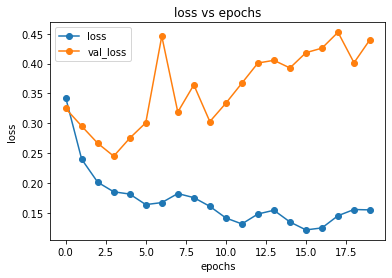

In [6]:
# loss
plt.plot(H.history['loss'], 'o-',label="loss")
plt.plot(H.history['val_loss'], 'o-', label="val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss vs epochs")
plt.legend();

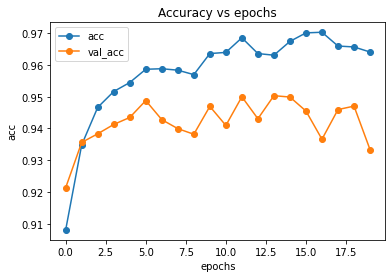

In [7]:
# accuracy
plt.plot(H.history['acc'], 'o-', label="acc")
plt.plot(H.history['val_acc'], 'o-', label="val_acc")
plt.xlabel("epochs")
plt.ylabel("acc")
plt.title("Accuracy vs epochs")
plt.legend();

## TASK 2
Re-run the training but this time:
- Stop the training when `val_acc` the accuracy on the validation set does not grow anymore 
- Save the model with the best accuracy as `my_best_network.hdf5`

トレーニングを再実行してください。今回は
 - テストセットの精度（`val_acc`）が向上しなくなったら、トレーニングを中断する
 - モデルを `my_best_network.hdf5`として最高の精度で保存します

Note that you have to recreate the network to re-initialize the weights if you want to re-train from scratch.
<br>
Otherwise the training just updates the current weights.

<br>So, you have to re-run the cells from [Define the network](#define_the_network) to create a new model with fresh weights.

注：最初からトレーニングをやり直す場合は、重みを再初期化する必要があります（そうしなければ、トレーニングは現在の重みを更新するだけです）。そのためネットワークを再作成しなければなりません。
<br>
 [Define the network](#define_the_network)からのセルを再実行して、新しい重みを持つ新しいモデルを作成してください。

Plot again the evolution of the losses and accuracies.

もう一度損失と精度の進化をプロットしてください。

In [17]:
input_shape = X_train[0].shape
vector_input = Input(shape = input_shape, name='input')

fc1 = Dense(128, activation='relu', name='fc1')(vector_input)

fc2 = Dense(128, activation='relu', name='fc2')(fc1)

output = Dense(10, activation='softmax', name='output')(fc2)

network = Model(vector_input, output, name='classification')

network.summary()

network.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

early_stopping_cb = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=2, verbose=1, mode='auto')
model_checkpoint_cb = ModelCheckpoint("my_best_network.hdf5", monitor='val_acc', verbose=1, 
                                      save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')


H = network.fit(X_train, y_train_one_hot,
                batch_size=100, epochs=20,
                validation_data=(X_test, y_test_one_hot),
                callbacks=[early_stopping_cb, model_checkpoint_cb], 
                verbose=1)

Model: "classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               100480    
_________________________________________________________________
fc2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Train on 35000 samples, validate on 35000 samples
Epoch 1/20
31500/35000 [==========================>...] - ETA: 0s - loss: 0.3639 - acc: 0.9025
Epoch 00001: val_acc improved from -inf to 0.93009, saving model to my_best_network.hdf5
35000/3500

## TASK 3 - Recognize your own writting / 自分の手書き数字の認識

In the tests above the testing data was also from MNIST.
<br>
Let us now try to recognize some handwritten digits that are not from MNIST.

今までは、トレーニングにもテストにもMNISTのデータを使っていました。
<br>
今度は自分が書いた手書きの数字を認識してみましょう。

First load the network you want to test.

まず試してみたいネットワークをロードします。

In [18]:
network = load_model("my_best_network.hdf5")

Then, use the next cell  to draw a digit to test the classifier:
- Draw in the middle of the dark area
- The prediction is updated at each stroke
- Use the clear button to erase

Try the classification multiple times to empirically check the accuracy of the classifier.

次に、次のセルを使って数字を描いて分類器をテストしてください。
 - 暗い領域の真ん中に描いて
 - 予測は各ストロークで更新されます
 - 消去するにはクリアボタンを使用してください

分類器の精度を経験的に確認するために、分類を複数回試してください。

In [19]:
import ipywidgets as widgets
import jupyter_drawing_pad as jd
    
jdp = jd.CustomBox()
draw_pad = jdp.drawing_pad
clear_btn = jdp.children[1].children[1]

out = widgets.Output(layout=widgets.Layout(width='400px'))

@out.capture() 
def w_CB(change):
    from scipy.signal import convolve2d
    from cv2 import resize, INTER_CUBIC, cvtColor, COLOR_RGB2GRAY

    data = change['new']
    if len(data[0]) > 2:
        # Get strokes information
        x = np.array(data[0])
        y = np.array(data[1])
        t = np.array(data[2])

        # assuming there is at least 200ms between each stroke 
        line_breaks = np.where(np.diff(t) > 200)[0]
        # adding end of array
        line_breaks = np.append(line_breaks, t.shape[0])
        
        # Plot to canvas
        from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
        fig = plt.figure()
        canvas = FigureCanvas(fig)
        ax = fig.gca()

        # plot all strokes
        plt.plot(x[:line_breaks[0]], y[:line_breaks[0]], color='black', linewidth=4)
        for i in range(1, len(line_breaks)):
            plt.plot(x[line_breaks[i-1]+1 : line_breaks[i]], y[line_breaks[i-1]+1 : line_breaks[i]], color='black', linewidth=4)
        
        plt.xlim(0,460)
        plt.ylim(0,250)
        plt.axis("off")
        
        canvas.draw()       # draw the canvas, cache the renderer

        # convert to numpy array 
        imageflat = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
        # not sure why this size...
        image = np.reshape(imageflat,(288, 432, 3))
        
        # Cut the part containing the writting
        ind = np.where(image<255)      
        
        D0 = ind[0].max() - ind[0].min() 
        D1 = ind[1].max() - ind[1].min() 
        
        C0 = int(0.5 * (ind[0].max() + ind[0].min()))
        C1 = int(0.5 * (ind[1].max() + ind[1].min()))

        if D0 > D1:
            D = D0
        else:
            D = D1
        
        L = int(D / 2.0) + 20
        image = image[C0 - L : C0 + L ,  C1 - L : C1 + L, :] 
    
        # Convert to gray
        image = 255 - cvtColor(image, COLOR_RGB2GRAY)
        
        # Low pass filter and resize
        k = 12
        I = convolve2d(image, np.ones((k,k))/k**2.0, mode="same")      
                
        # Resize with opencv 
        I = resize(I, dsize=(28, 28), interpolation=INTER_CUBIC)
        
        # Clip in [0, 1]
        I = I / I.max()
        I = I * 3.0
        I = I.clip(0, 1)
        
        # Get a feature vector
        Xv =  I.reshape((1, 28*28)).astype(np.float64) 
        
        # Standardization
        Xv = scaler.transform(Xv)
        
        # Apply the classifier
        y_pred_one_hot = network.predict(Xv)
        y_prediction = np.argmax(y_pred_one_hot)
        v = np.max(y_pred_one_hot)    
        
        title = "Prediction: {} ({:.02f})".format(y_prediction, v)    
        
        # draw the converted image
        plt.clf()
        plt.imshow(I, aspect='equal', cmap = mpl.cm.binary, interpolation='none')
        plt.title(title)
        plt.axis("off")
              
        plt.show()

        # To erase after tracing
        #change['owner'].data = [[], [], []]
        
        # Schedule for clearing
        out.clear_output(wait=True)
    else:
        pass
        
draw_pad.observe(w_CB, names='data')

hb = widgets.HBox([draw_pad, clear_btn, out])
display(hb)

## OPTIONAL 1
Until now we split the dataset into testing and training sets.
<br>
However, in many cases, the dataset is split between a __development set__ and a testing set.

For example, in a "competition", the competing teams only have access to the development set to build their classifier and the testing set is kept secret by the organizers.
<br>
After the development period is over, the organizers use the testing set to compute the accuracy of the classifiers built by the participants to decide the winner.

これまでは、データセットをテストセットとトレーニングセットに分割しました。
<br>
ただし、多くの場合、データセットは__開発用のセット__とテストセットに分割されています。

> Even if you have access to the full data including the training dataset, it is standard practice to create a test set at the begining, put it aside, and never use it. You only use it at the very end, after you decided which classifier to use and tuned it, to get the final evaluation of the performance.

Since we do not have access to the testing set, the development set is usually split in two sets:
- a training set to train the classifier
- a __validation set__ to check if the training is well done (validate the training).

In particular, the validation set is used to stop the training before overfitting occurs (early stopping).

The `fit` function provides a way to automatically create a validation set:
- the parameter `validation_split` determine the ratio of the training data to be used for validation
- if the parameter `shuffle` is `True` a different random split is done at each epoch

The next command applies `fit` with 50% of validation data and a random shuffling at each epoch:

```H = network.fit(X_train, y_train_one_hot, 
                    batch_size=100, epochs=10,
                    validation_split=0.5 , shuffle=True,
                    callbacks=[early_stopping_cb, 
                    model_checkpoint_cb],
                    verbose=1)
                    ```
                    
This call to `fit` also sets an `EarlyStopping` callback.

Train 3 networks using:
- 5% of the training set for validation; save the best network as `best_network_05.hdf5`
- 50% of the training set for validation; save the best network as `best_network_50.hdf5` 
- 95% of the training set for validation; save the best network as `best_network_95.hdf5` 

Check the confusion matrix on the testing set for each of these three networks.

In [33]:
model_checkpoint_cb = ModelCheckpoint("best_network_05.hdf5", monitor='val_loss', verbose=1, 
                                      save_best_only=True, save_weights_only=False, mode='auto', save_fre='epoch')
H = network.fit(X_train, y_train_one_hot, 
                    batch_size=100, epochs=10,
                    validation_split=0.05 , shuffle=True,
                    callbacks=[early_stopping_cb, 
                    model_checkpoint_cb],
                    verbose=1)
y_pred_one_hot = network.predict(X_test)

Train on 33250 samples, validate on 1750 samples
Epoch 1/10
30100/33250 [==========================>...] - ETA: 0s - loss: 0.2515 - acc: 0.9510
Epoch 00001: val_loss improved from inf to 0.31078, saving model to best_network_05.hdf5
33250/33250 [==============================] - 0s 15us/sample - loss: 0.2559 - acc: 0.9507 - val_loss: 0.3108 - val_acc: 0.9366
Epoch 2/10
32300/33250 [============================>.] - ETA: 0s - loss: 0.1996 - acc: 0.9568
Epoch 00002: val_loss did not improve from 0.31078
33250/33250 [==============================] - 0s 15us/sample - loss: 0.2008 - acc: 0.9566 - val_loss: 0.3964 - val_acc: 0.9429
Epoch 3/10
32800/33250 [============================>.] - ETA: 0s - loss: 0.1487 - acc: 0.9630
Epoch 00003: val_loss improved from 0.31078 to 0.30156, saving model to best_network_05.hdf5
33250/33250 [==============================] - 1s 15us/sample - loss: 0.1492 - acc: 0.9628 - val_loss: 0.3016 - val_acc: 0.9366
Epoch 4/10
33200/33250 [=========================

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.argmax(y_pred_one_hot, axis=1)
CM = confusion_matrix(y_test, y_pred)
print(CM)
acc = accuracy_score(y_test, y_pred)
print(acc)

[[3293    1   92    2    2    5   11    1   15    1]
 [   0 3818  112    4    3    1    4    2   21    4]
 [   7    7 3383   24   21    0    6    8   27    6]
 [   1    2  182 3252    0   17    0    3   14   28]
 [   1    3  107    0 3243    2   17    7    5   47]
 [  10    0  126   54    4 2862   21    1   16   16]
 [  11    4  123    1    6    8 3346    0    6    0]
 [   5    9  225   38    3    3    1 3000    4  356]
 [   3   12  143   18    3   16   14    3 3227   24]
 [   3    3  109   14   40    6    1   15   12 3263]]
0.9339142857142857


In [35]:
model_checkpoint_cb = ModelCheckpoint("best_network_50.hdf5", monitor='val_loss', verbose=1, 
                                      save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
H = network.fit(X_train, y_train_one_hot, 
                    batch_size=100, epochs=10,
                    validation_split=0.5 , shuffle=True,
                    callbacks=[early_stopping_cb, 
                    model_checkpoint_cb],
                    verbose=1)
y_pred_one_hot = network.predict(X_test)

Train on 17500 samples, validate on 17500 samples
Epoch 1/10
14700/17500 [========================>.....] - ETA: 0s - loss: 0.1179 - acc: 0.9691
Epoch 00001: val_loss improved from inf to 0.15982, saving model to best_network_50.hdf5
17500/17500 [==============================] - 0s 24us/sample - loss: 0.1206 - acc: 0.9692 - val_loss: 0.1598 - val_acc: 0.9684
Epoch 2/10
14200/17500 [=======================>......] - ETA: 0s - loss: 0.1011 - acc: 0.9725
Epoch 00002: val_loss improved from 0.15982 to 0.15366, saving model to best_network_50.hdf5
17500/17500 [==============================] - 0s 24us/sample - loss: 0.1019 - acc: 0.9718 - val_loss: 0.1537 - val_acc: 0.9615
Epoch 3/10
17300/17500 [============================>.] - ETA: 0s - loss: 0.1376 - acc: 0.9702
Epoch 00003: val_loss did not improve from 0.15366
17500/17500 [==============================] - 0s 24us/sample - loss: 0.1403 - acc: 0.9699 - val_loss: 0.2085 - val_acc: 0.9543
Epoch 00003: early stopping


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.argmax(y_pred_one_hot, axis=1)
CM = confusion_matrix(y_test, y_pred)
print(CM)
acc = accuracy_score(y_test, y_pred)
print(acc)

[[3342    2   62    0    1    4    2    1    5    4]
 [   0 3881   70    3    1    1    3    8    2    0]
 [   4    5 3404   10   15    0    2   36    9    4]
 [   1    4  422 2990    1   30    0    7   32   12]
 [   0    7   87    0 3269    2    4    4    0   59]
 [   8    3  148   21    4 2889   26    2    4    5]
 [  12    3  212    1   10    4 3256    0    5    2]
 [   6   13  167    3    5    5    0 3417    0   28]
 [   5   19  292    8    7   15   16    3 3076   22]
 [   1    8  114   17   41    7    1   26    9 3242]]
0.9361714285714285


In [37]:
model_checkpoint_cb = ModelCheckpoint("best_network_95.hdf5", monitor='val_loss', verbose=1, 
                                      save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
H = network.fit(X_train, y_train_one_hot, 
                    batch_size=100, epochs=10,
                    validation_split=0.95 , shuffle=True,
                    callbacks=[early_stopping_cb, 
                    model_checkpoint_cb],
                    verbose=1)
y_pred_one_hot = network.predict(X_test)

Train on 1750 samples, validate on 33250 samples
Epoch 1/10
 100/1750 [>.............................] - ETA: 0s - loss: 0.1073 - acc: 0.9500
Epoch 00001: val_loss improved from inf to 0.17598, saving model to best_network_95.hdf5
1750/1750 [==============================] - 0s 192us/sample - loss: 0.1009 - acc: 0.9657 - val_loss: 0.1760 - val_acc: 0.9599
Epoch 2/10
 100/1750 [>.............................] - ETA: 0s - loss: 0.1037 - acc: 0.9700
Epoch 00002: val_loss did not improve from 0.17598
1750/1750 [==============================] - 0s 190us/sample - loss: 0.0851 - acc: 0.9749 - val_loss: 0.1780 - val_acc: 0.9684
Epoch 3/10
 100/1750 [>.............................] - ETA: 0s - loss: 0.0419 - acc: 0.9800
Epoch 00003: val_loss improved from 0.17598 to 0.17209, saving model to best_network_95.hdf5
1750/1750 [==============================] - 0s 193us/sample - loss: 0.0583 - acc: 0.9777 - val_loss: 0.1721 - val_acc: 0.9682
Epoch 4/10
 100/1750 [>.............................] - ET

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = np.argmax(y_pred_one_hot, axis=1)
CM = confusion_matrix(y_test, y_pred)
print(CM)
acc = accuracy_score(y_test, y_pred)
print(acc)

[[3332    2    9   53    1    4    2    1   10    9]
 [   0 3863   13   54    0    1    2    8   27    1]
 [   5    3 3138  245   13    1    2   35   36   11]
 [   1    5   12 3412    0   24    0    7   31    7]
 [   0    7    6   87 3207    1    4    6    2  112]
 [   5    3    1  147    3 2908   12    1   17   13]
 [  10    3   18  164   10   19 3263    0   16    2]
 [   4   13   11  156    5    3    0 3395    6   51]
 [   4   12   12  132    5   12    6    2 3267   11]
 [   1    6    1  105   17    8    1   18   18 3291]]
0.9450285714285714
